In [1]:
#Descriptive Analysis
import pandas as pd
data = pd.read_csv(r"C:\Users\haziq\Downloads\d_us_txt\consolidatedonlynysenoexchange ready.csv")
print(data.describe())

                VOL          VALUE
count  7.260240e+05  726023.000000
mean   1.613584e+06     115.158977
std    3.938170e+06    2680.402610
min    0.000000e+00       0.340000
25%    1.208310e+05      11.760000
50%    4.594680e+05      23.570000
75%    1.509203e+06      40.510000
max    8.226809e+07  121289.550000


In [2]:
#DATA QUALITY CHECK
# Check for any missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())


TICKER    0
DATE      0
VOL       0
VALUE     1
dtype: int64
0


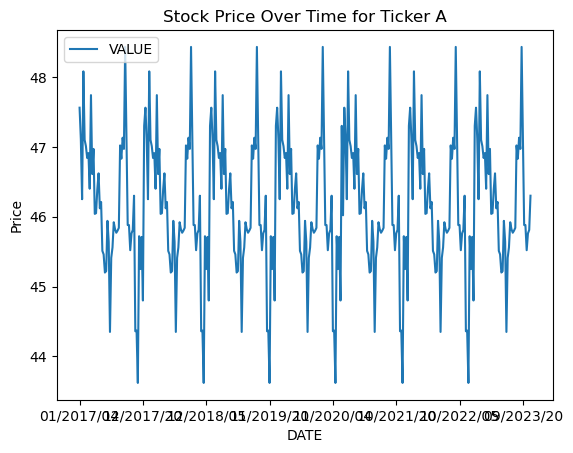

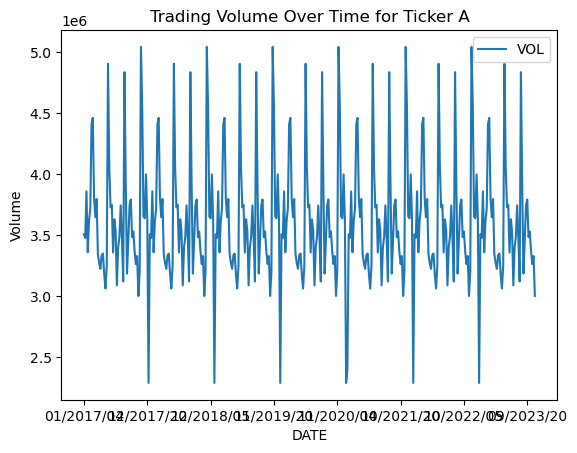

In [3]:
#TIME SERIES ANALYSIS

import matplotlib.pyplot as plt

# Plot stock prices over time for a single stock
data[data['TICKER'] == 'A'].plot(x='DATE', y='VALUE')
plt.title('Stock Price Over Time for Ticker A')
plt.ylabel('Price')
plt.show()

# Plot trading volume over time for a single stock
data[data['TICKER'] == 'A'].plot(x='DATE', y='VOL')
plt.title('Trading Volume Over Time for Ticker A')
plt.ylabel('Volume')
plt.show()


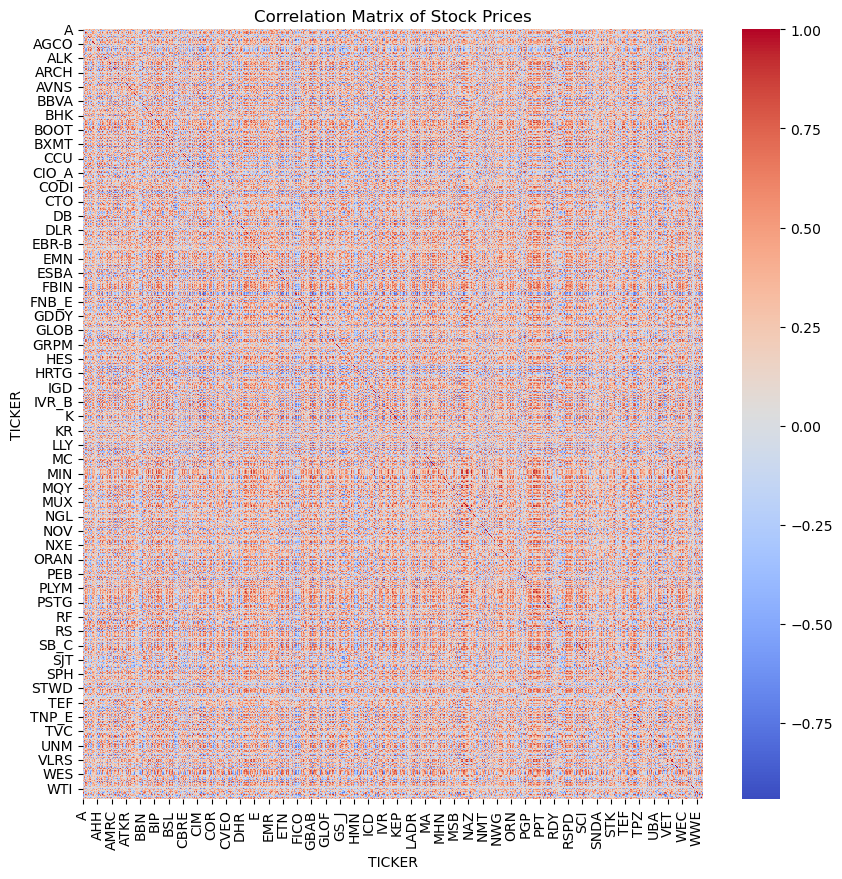

In [4]:
#CORRELATION ANALYSIS
# Pivot the data for correlation analysis
pivot_data = data.pivot_table(index='DATE', columns='TICKER', values='VALUE')
correlation_matrix = pivot_data.corr()

# Plotting a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Prices')
plt.show()


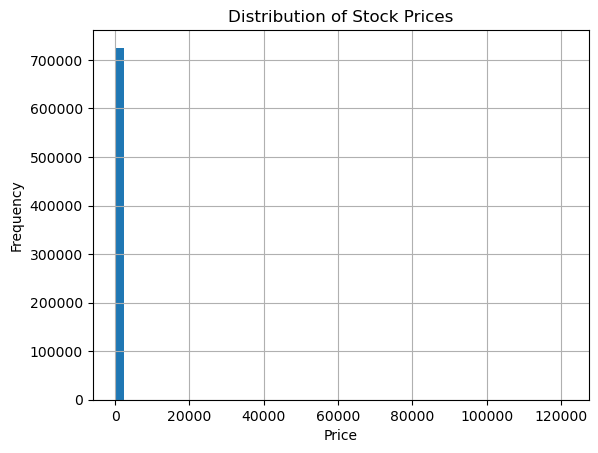

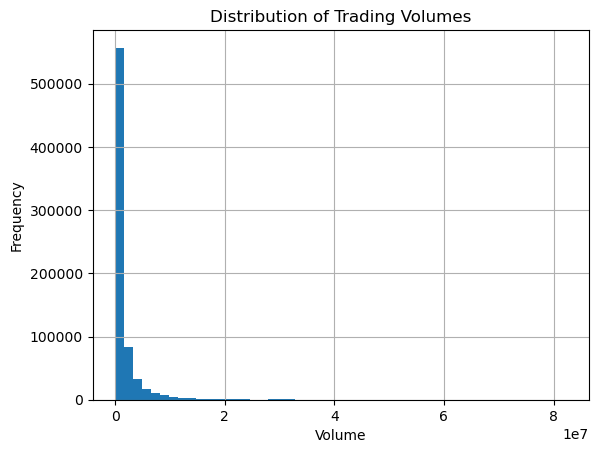

In [5]:
#DISTRIBUTION ANALYSIS
# Histogram of stock values
data['VALUE'].hist(bins=50)
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histogram of trading volumes
data['VOL'].hist(bins=50)
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


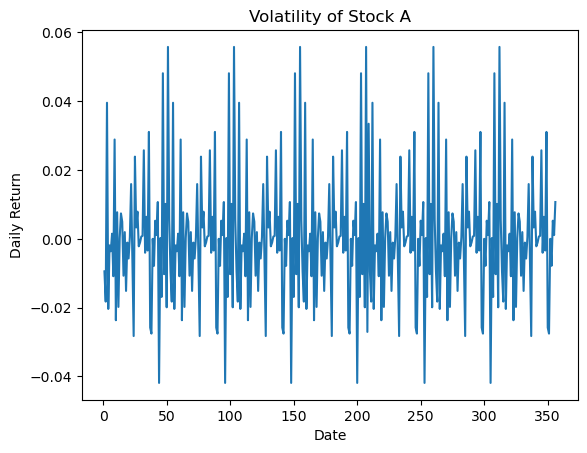

In [6]:
#VOLITILITY ANALYSIS
# Calculate daily returns as a proxy for volatility
data['RETURN'] = data.groupby('TICKER')['VALUE'].pct_change()

# Plotting the volatility of a stock
data[data['TICKER'] == 'A']['RETURN'].plot()
plt.title('Volatility of Stock A')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
